# Preprocessing Exercises

In [1]:
# Useful imports
import numpy as np
import pandas as pd
from matplotlib import pylab

# Settings for plots
%pylab inline

pylab.rcParams['figure.figsize'] = (10.0, 6.0)
font = {'size'   : 18}
pyplot.rc('font', **font)

pyplot.rc('xtick', labelsize=14) 
pyplot.rc('ytick', labelsize=14) 

Populating the interactive namespace from numpy and matplotlib


## EXERCISE 1

Faces occupy a very small subset of the space of possible images. Moreover, their pixel representation are highly redundant due, for example, to symmetry. It is thus possible to re-code pixel images representing faces to a smaller set of features without losing much information.

We will try this preprocessing step on the Olivetti faces data set, consisting of 64x64 greyscale images of faces.

1. Run PCA on the data set. How many features are needed to encode 95% of the original variance?
2. Display the mean face computed by the PCA object using the `show_face` function
   defined below (the attribute containing the mean face is called `pca.mean_`).
3. Display the principal components, i.e. the directions of maximal variance 
   (the attribute is called `pca.components_`). Note that you will need to
   set the optional argument `vmin` and `vmax` of `show_face`, since
   the principal component vectors have a different range (try with
   `vmin=-0.05` and `vmax=0.05`).
4. Transform a face in PCA space (`pca.transform`), and transform it back to the 
   original space (`pca.inverse_transform`). Visually compare the error made because
   of the dimensionality reduction by plotting the two images.

In [2]:
from sklearn import datasets

# Load the Olivetti faces data set.
dataset = datasets.fetch_olivetti_faces(shuffle=True, random_state=0)
faces = dataset.data

In [3]:
def show_face(face, vmin=0.0, vmax=1.0):
    """ Utility function to display a face.
    
    The first input argument, `face`, is a single vector containing
    the individual pixels forming a face image (e.g., a row of the
    `faces` array.).
    
    The optional arguments, `vmin` and `vmax` control the colormap
    range. `vmin` is the minimum value corresponding to "black", and
    `vmax` is the maximum value, corresponding to "white".
    """
    face = face.reshape(64, 64)
    imshow(face, cmap=cm.gray, vmin=vmin, vmax=vmax)
    axis('off')

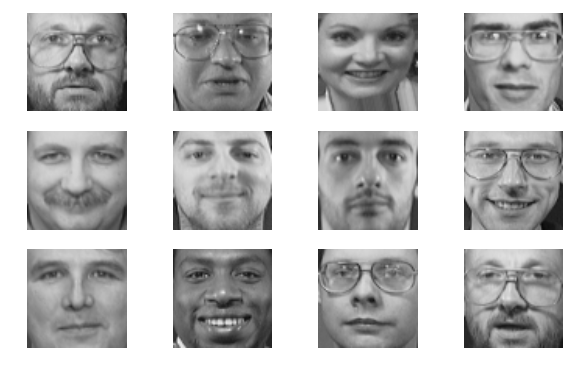

In [4]:
# For your reference, this code show the first 12 faces in the data set.
for idx, face in enumerate(faces[:12,:]):
    subplot(3, 4, idx+1)
    show_face(face)

In [5]:
from sklearn import decomposition

# Note that there is no need to normalize the pixels, since they all represent
# the same quantity. Differences in variance are thus real, and not due to
# different scales.
pca = decomposition.PCA(n_components=0.95)
pca.fit(faces)

PCA(copy=True, n_components=0.95, whiten=False)

In [6]:
print 'Initial number of features:', faces.shape[1]
print 'After PCA:', pca.n_components_

Initial number of features: 4096
After PCA: 123


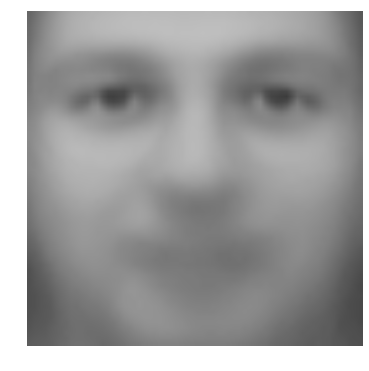

In [7]:
# Display the average face.
show_face(pca.mean_)

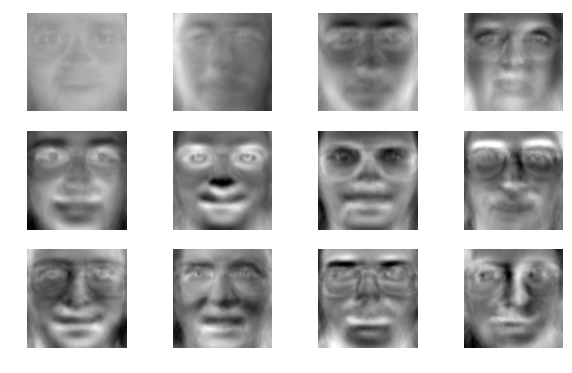

In [8]:
# Display the first 12 principal components.
for idx, face in enumerate(pca.components_[:12,:]):
    subplot(3, 4, idx+1)
    show_face(face, vmin=-0.05, vmax=0.05)

In [2]:
# The pca_face_creator script allows to exlore the principal components
# space interactively. Requires the `traits`, `traitsui`, and `chaco` packages.
%run pca_face_creator.py

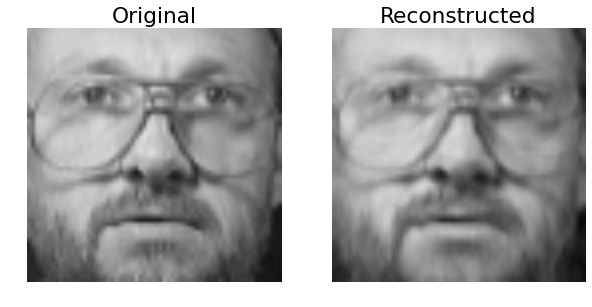

In [9]:
# Project a face on the principal components, and then back
# into the space of 64x64 images.
orig_face = faces[0:1,:]
pca_face = pca.transform(orig_face)
reconstr_face = pca.inverse_transform(pca_face)

subplot(1, 2, 1)
show_face(orig_face)
title('Original')
subplot(1, 2, 2)
title('Reconstructed')
show_face(reconstr_face)
